Name : Silva G.B.N.M. <br>
Index No : 190592X

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage.feature import peak_local_max

Question 1

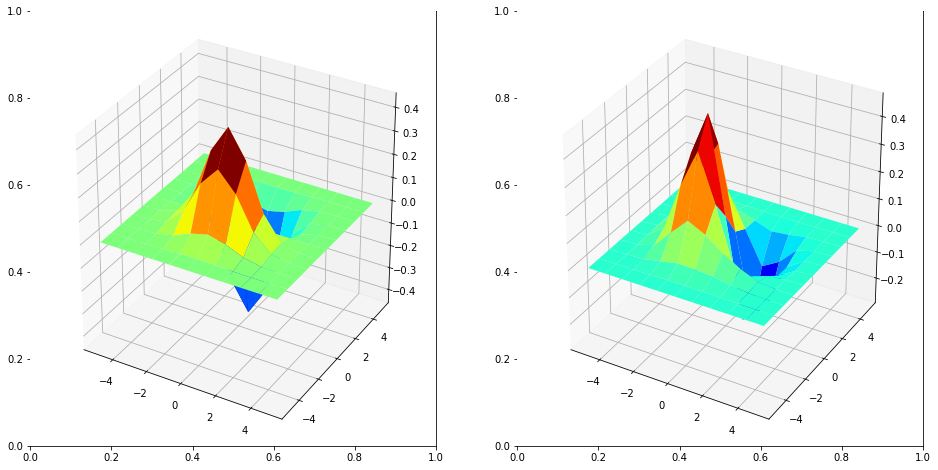

In [18]:
delta = 1
xx, yy = np.meshgrid(np.arange(-5,5+delta,delta),np.arange(-5,5+delta,delta))
sigma = 1

g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
g /= np.sum(g)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[1,0,1]],dtype=np.float32)

g_x = cv.filter2D(g,-1,sobel_v)
g_y = cv.filter2D(g,-1,sobel_h)
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax = fig.add_subplot(121,projection='3d')
ax1 = fig.add_subplot(122,projection='3d')

surf1 = ax.plot_surface(xx,yy,g_x,cmap=cm.jet,linewidth=0,antialiased=True)
surf2 = ax1.plot_surface(xx,yy,g_y,cmap=cm.jet,linewidth=0,antialiased=True)

plt.show()

Question 2

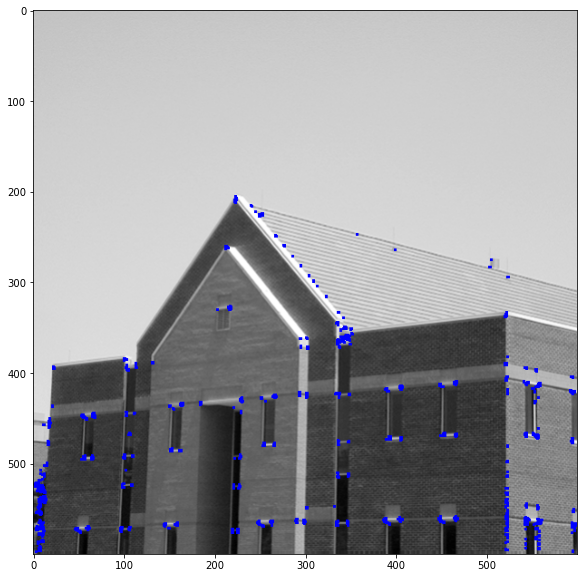

In [5]:
img = cv.imread(r'images/building.tif',cv.IMREAD_COLOR)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
img[dst>0.01*dst.max()] = [0,0,255]

cv.imshow('dst',img)
cv.waitKey(0)
cv.destroyAllWindows()

fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(img,cmap='gray')
plt.show()

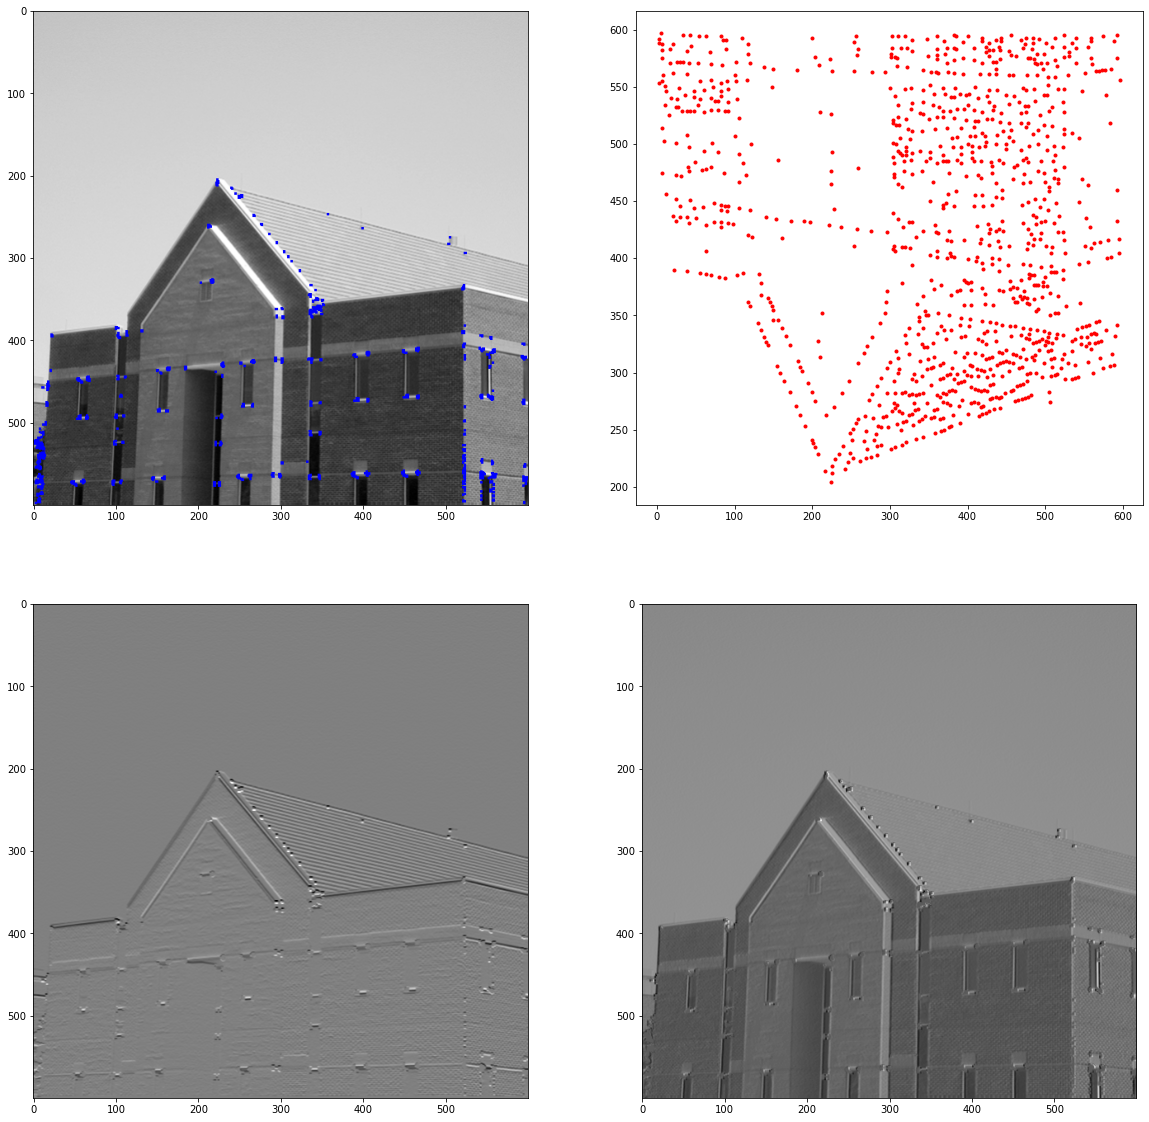

In [7]:
I = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I = np.float32(I)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
sobel_h = np.array([[-1,0,1],[-2,0,2],[1,0,1]],dtype=np.float32)

Ix = cv.filter2D(I,-1,sobel_v)
Iy = cv.filter2D(I,-1,sobel_h)

sigma = 3
ksize = 7

m11 = cv.GaussianBlur(Ix*Ix,(ksize,ksize),sigma)
m12 = cv.GaussianBlur(Ix*Iy,(ksize,ksize),sigma)
m21 = m12
m22 = cv.GaussianBlur(Iy*Iy,(ksize,ksize),sigma)

det = m11*m22-m12*m21
trace = m11 + m22
alpha = 0.04
R = det-alpha*trace**2
R[R<1e4] = 0 
coordinates = peak_local_max(R,min_distance=2)


fig,ax = plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,1].plot(coordinates[:,1],coordinates[:,0],'r.')
ax[1,0].imshow(Ix+127,cmap='gray')
ax[1,1].imshow(Iy+127,cmap='gray')
plt.show()

Question 4

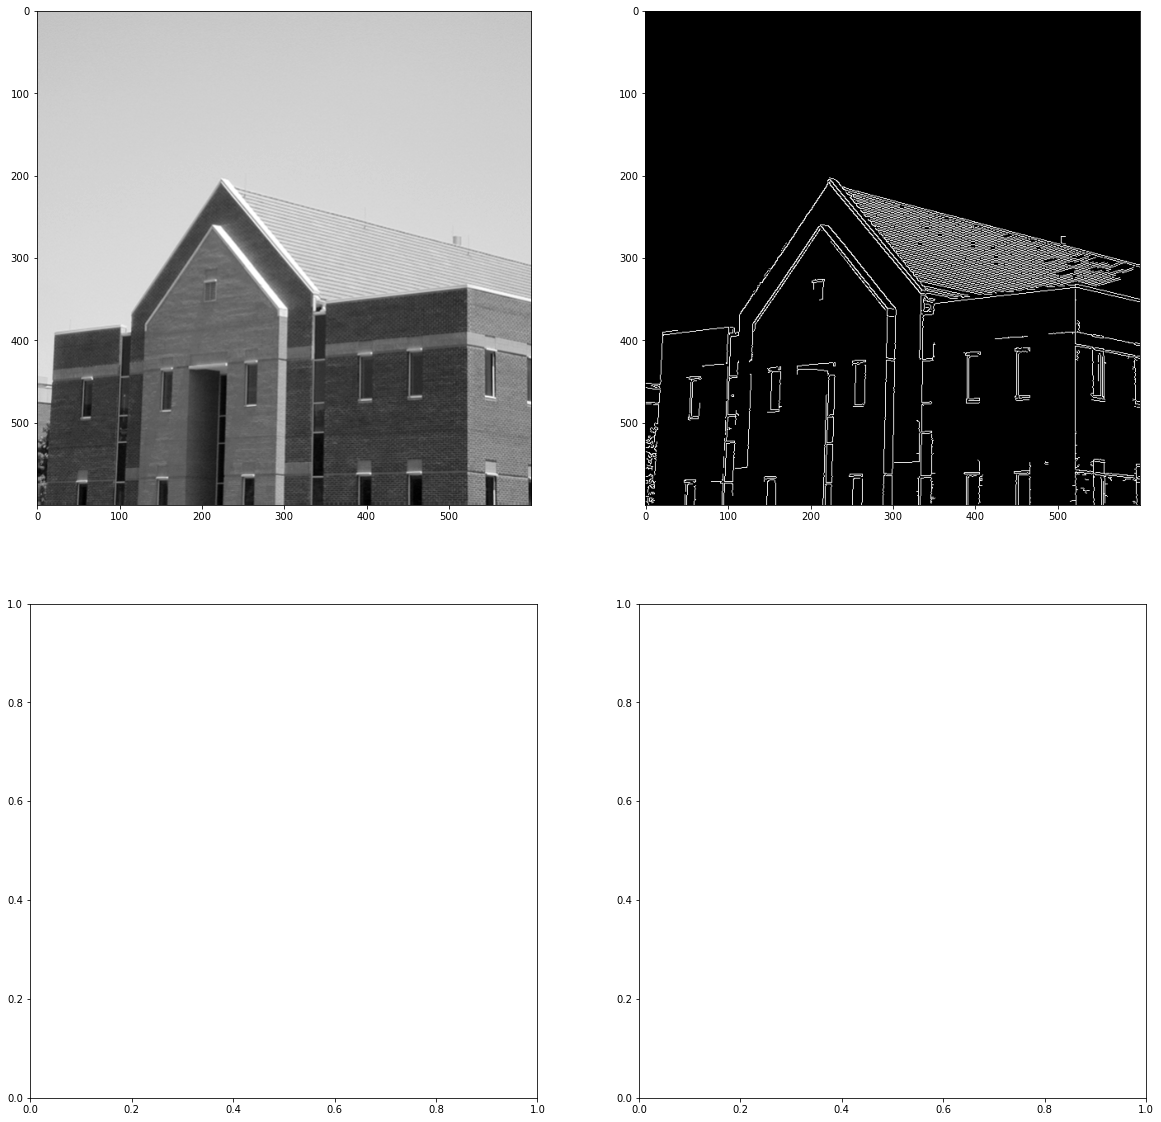

In [17]:
img = cv.imread(r'images/building.tif',cv.IMREAD_GRAYSCALE)
edges = cv.Canny(img,100,200)
fig,ax = plt.subplots(2,2,figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,1].imshow(edges,cmap='gray')
plt.show()